In [3]:
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import requests
import zipfile
import os
import glob
import io

pd.set_option('display.max_colwidth', None)

#ignore warnings

import warnings

warnings.filterwarnings("ignore")

In [4]:
cols_10_18 = ['FECHA', 'RANGO HORARIO', 'DISTRITO', 'LUGAR ACCIDENTE', 'Nº', 'Nº PARTE', 'LESIVIDAD']
cols_19_23 = ['num_expediente', 'fecha', 'hora', 'cod_lesividad', 'coordenada_x_utm', 'coordenada_y_utm']

print('a10')
a10 = pd.read_excel('../data/2010_Accidentalidad.xlsx', usecols=cols_10_18)
print('a11')
a11 = pd.read_excel('../data/2011_Accidentalidad.xlsx', usecols=cols_10_18)
print('a12')
a12 = pd.read_excel('../data/2012_Accidentalidad.xlsx', usecols=cols_10_18)
print('a13')
a13 = pd.read_excel('../data/2013_Accidentalidad.xlsx', usecols=cols_10_18)
print('a14')
a14 = pd.read_excel('../data/2014_Accidentalidad.xlsx', usecols=cols_10_18)
print('a15')
a15 = pd.read_excel('../data/2015_Accidentalidad.xlsx', usecols=cols_10_18)
print('a16')
a16 = pd.read_excel('../data/2016_Accidentalidad.xlsx', usecols=cols_10_18)
print('a17')
a17 = pd.read_excel('../data/2017_Accidentalidad.xlsx', usecols=cols_10_18)
print('a18')
a18 = pd.read_excel('../data/2018_Accidentalidad.xlsx', usecols=cols_10_18)
print('a19')
a19 = pd.read_excel('../data/2019_Accidentalidad.xlsx', usecols=cols_19_23)
print('a20')
a20 = pd.read_excel('../data/2020_Accidentalidad.xlsx', usecols=cols_19_23)
print('a21')
a21 = pd.read_excel('../data/2021_Accidentalidad.xlsx', usecols=cols_19_23)
print('a22')
a22 = pd.read_excel('../data/2022_Accidentalidad.xlsx', usecols=cols_19_23)
print('a23')
a23 = pd.read_excel('../data/2023_Accidentalidad.xlsx', usecols=cols_19_23)
print('a24')
a24 = pd.read_excel('../data/2024_Accidentalidad.xlsx', usecols=cols_19_23)

a10_18 = pd.concat([a10, a11, a12, a13, a14, a15, a16, a17, a18])

a19_24 = pd.concat([a19, a20, a21, a22, a23, a24])

a10


In [ ]:
#1 ROW PER ACCIDENT, KEEP THE MOST SEVERE

a10_18['LESIVIDAD'] = a10_18['LESIVIDAD'].str.strip()

lesividad = {'NO ASIGNADA': 0, 'IL': 0, 'HL': 1, 'HG': 2, 'MT': 3}

a10_18['LESIVIDAD'] = a10_18['LESIVIDAD'].map(lesividad)

a10_18 = a10_18.sort_values('LESIVIDAD', ascending=False).drop_duplicates('Nº PARTE').sort_index()

a10_18.drop(['Nº PARTE'], axis=1, inplace=True)

lesividad2 = {14: 0, 77: 0, 1: 1, 2: 1, 5: 1, 6:1, 7:1, 3:2, 4:3, np.nan: 0}

a19_24['cod_lesividad'] = a19_24['cod_lesividad'].map(lesividad2)

a19_24 = a19_24.sort_values('cod_lesividad', ascending=False).drop_duplicates('num_expediente').sort_index()

a19_24.drop(['num_expediente'], axis=1, inplace=True)

In [ ]:
a19_24

,fecha,hora,cod_lesividad,coordenada_x_utm,coordenada_y_utm
0,2022-01-01,01:30:00,0,4.433592e+05,4.472082e+06
0,2020-09-07,23:00:00,0,4.445782e+05,4.475148e+06
0,2019-02-04,09:10:00,1,4.400680e+05,4.475679e+06
0,2024-01-04,14:09:00,1,4.449131e+08,4.481427e+09
1,2021-01-01,04:30:00,1,4.449765e+05,4.470508e+06
...,...,...,...,...,...
51801,2019-12-17,15:36:00,0,4.424261e+05,4.468957e+06
51803,2019-11-16,14:45:00,1,4.399618e+05,4.477601e+06
51804,2019-11-10,11:00:00,1,4.391155e+05,4.470746e+06
51808,2019-03-13,12:47:00,0,4.385415e+05,4.479293e+06


In [ ]:
id_loc = pd.read_excel('../data/id_location.xlsx', usecols=['id', 'utm_x', 'utm_y', 'longitud', 'latitud'])

id_loc

,id,utm_x,utm_y,longitud,latitud
0,3840,441615.343347,4.475768e+06,-3.688323,40.430502
1,3841,441705.882340,4.475770e+06,-3.687256,40.430524
2,3842,441319.371258,4.474841e+06,-3.691727,40.422132
3,3843,441301.632986,4.474764e+06,-3.691929,40.421433
4,3844,441605.765072,4.476132e+06,-3.688470,40.433782
...,...,...,...,...,...
4890,6809,444065.316510,4.481586e+06,-3.659954,40.483080
4891,6810,444067.760453,4.481594e+06,-3.659926,40.483158
4892,6933,443003.125903,4.481709e+06,-3.672497,40.484118
4893,7129,443002.925186,4.481716e+06,-3.672500,40.484181


In [ ]:
id_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        4895 non-null   int64  
 1   utm_x     4895 non-null   float64
 2   utm_y     4895 non-null   float64
 3   longitud  4895 non-null   float64
 4   latitud   4895 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 191.3 KB


In [ ]:
a19_24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96584 entries, 0 to 51809
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             96584 non-null  datetime64[ns]
 1   hora              96584 non-null  object        
 2   cod_lesividad     96584 non-null  int64         
 3   coordenada_x_utm  96562 non-null  float64       
 4   coordenada_y_utm  96562 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.4+ MB


In [ ]:
a19_24.describe()

,cod_lesividad,coordenada_x_utm,coordenada_y_utm
count,96584.000000,9.656200e+04,9.656200e+04
mean,0.493612,7.947410e+06,8.044341e+07
std,0.556398,5.708354e+07,5.777813e+08
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,4.399562e+05,4.471916e+06
50%,0.000000,4.418043e+05,4.475100e+06
75%,1.000000,4.442067e+05,4.477787e+06
max,3.000000,4.539345e+08,4.486520e+09


In [ ]:
a19_24.dropna(subset=['coordenada_x_utm'], inplace=True)

a19_24.drop(a19_24[a19_24['coordenada_x_utm'] == a19_24['coordenada_x_utm'].min()].index, inplace=True)

a19_24

,fecha,hora,cod_lesividad,coordenada_x_utm,coordenada_y_utm
0,2022-01-01,01:30:00,0,4.433592e+05,4.472082e+06
0,2020-09-07,23:00:00,0,4.445782e+05,4.475148e+06
0,2019-02-04,09:10:00,1,4.400680e+05,4.475679e+06
0,2024-01-04,14:09:00,1,4.449131e+08,4.481427e+09
1,2021-01-01,04:30:00,1,4.449765e+05,4.470508e+06
...,...,...,...,...,...
51801,2019-12-17,15:36:00,0,4.424261e+05,4.468957e+06
51803,2019-11-16,14:45:00,1,4.399618e+05,4.477601e+06
51804,2019-11-10,11:00:00,1,4.391155e+05,4.470746e+06
51808,2019-03-13,12:47:00,0,4.385415e+05,4.479293e+06


In [ ]:
a19_24.describe(), a19_24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96557 entries, 0 to 51809
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             96557 non-null  datetime64[ns]
 1   hora              96557 non-null  object        
 2   cod_lesividad     96557 non-null  int64         
 3   coordenada_x_utm  96557 non-null  float64       
 4   coordenada_y_utm  96557 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.4+ MB


(       cod_lesividad  coordenada_x_utm  coordenada_y_utm
 count   96557.000000      9.655700e+04      9.655700e+04
 mean        0.493636      7.947807e+06      8.044744e+07
 std         0.556395      5.708499e+07      5.777960e+08
 min         0.000000      4.290783e+05      4.463456e+06
 25%         0.000000      4.399562e+05      4.471916e+06
 50%         0.000000      4.418044e+05      4.475100e+06
 75%         1.000000      4.442068e+05      4.477787e+06
 max         3.000000      4.539345e+08      4.486520e+09,
 None)

In [ ]:
#Get the row where the coordinates are minimum

a19_24[a19_24['coordenada_y_utm'] > 4500000]

,fecha,hora,cod_lesividad,coordenada_x_utm,coordenada_y_utm
0,2024-01-04,14:09:00,1,444913056.0,4.481427e+09
6,2024-01-01,01:20:00,1,443926583.0,4.473998e+09
12,2024-01-01,02:45:00,0,443248639.0,4.471571e+09
17,2024-01-01,02:00:00,0,444512986.0,4.473729e+09
20,2024-01-01,02:45:00,0,436808870.0,4.469484e+09
...,...,...,...,...,...
3866,2024-01-18,12:15:00,0,440956827.0,4.476795e+09
3868,2024-01-30,18:30:00,0,445613297.0,4.471684e+09
3870,2024-01-31,09:05:00,1,444464372.0,4.476186e+09
3873,2024-01-27,13:14:00,0,439084688.0,4.477568e+09


In [ ]:
#divide by 1000 to get the correct x and y coordinates where x coordinates are greater than 470000


a19_24['coordenada_x_utm'] = np.where(a19_24['coordenada_x_utm'] > 470000, a19_24['coordenada_x_utm'] / 1000, a19_24['coordenada_x_utm'])

a19_24['coordenada_y_utm'] = np.where(a19_24['coordenada_y_utm'] > 4500000, a19_24['coordenada_y_utm'] / 1000, a19_24['coordenada_y_utm'])

In [ ]:
a19_24[a19_24['coordenada_y_utm'] > 4500000]

,fecha,hora,cod_lesividad,coordenada_x_utm,coordenada_y_utm,id


In [ ]:
#for each row in a19_24, find the closest location in id_loc

from scipy.spatial import distance

# Convert the coordinates to NumPy arrays for faster computation
a19_24_coords = a19_24[['coordenada_x_utm', 'coordenada_y_utm']].values
id_loc_coords = id_loc[['utm_x', 'utm_y']].values

# Use cdist to compute pairwise distances efficiently
distances = distance.cdist(a19_24_coords, id_loc_coords, metric='euclidean')

# Find the index of the minimum distance for each row
min_indices = np.argmin(distances, axis=1)

# Map the indices to the corresponding 'id' in id_loc
a19_24['id'] = id_loc.iloc[min_indices]['id'].values

a19_24


,fecha,hora,cod_lesividad,coordenada_x_utm,coordenada_y_utm,id
0,2022-01-01,01:30:00,0,443359.226,4472082.272,5852
0,2020-09-07,23:00:00,0,444578.153,4475148.102,6135
0,2019-02-04,09:10:00,1,440068.049,4475679.170,7067
0,2024-01-04,14:09:00,1,444913.056,4481427.179,6311
1,2021-01-01,04:30:00,1,444976.463,4470508.259,5792
...,...,...,...,...,...,...
51801,2019-12-17,15:36:00,0,442426.146,4468956.960,6490
51803,2019-11-16,14:45:00,1,439961.798,4477600.669,5772
51804,2019-11-10,11:00:00,1,439115.482,4470746.354,3635
51808,2019-03-13,12:47:00,0,438541.541,4479292.853,9931


In [ ]:
path = '../drivers/msedgedriver.exe'

driver = webdriver.Edge(executable_path=path)

C:\Users\calba\AppData\Local\Temp\ipykernel_64368\600598185.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Edge(executable_path=path)


In [17]:
url = "https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=33cb30c367e78410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"

driver.get(url)

driver.implicitly_wait(2)

driver.maximize_window()
# Click the "Accept" button on the cookie banner
try:
    accept_button = driver.find_element(By.ID, "iam-cookie-control-modal-action-primary")
    accept_button.click()
except:
    pass

enlaces = driver.find_element(By.XPATH, '//*[@id="readspeaker"]/div[3]/div/div[1]/div/a')

try:
    enlaces.click()
except:
    pass

time.sleep(1)

links = driver.find_elements(By.XPATH, '//*[@id="readspeaker"]/div[3]/div/div[1]/ul/li/ul/li/ul/li/a')[:106]

urls  = []

for i in links:
    urls.append(i.get_attribute('href'))

count = 0

for i in urls:
    
    count += 1
    
    r = requests.get(i)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('zips')

path = os.getcwd()

csv_files = glob.glob(os.path.join(path + '\\zips', "*.csv"))



driver.quit()


In [15]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path + '\\zips', "*.csv"))

In [16]:
len(csv_files)

0

In [17]:
a19_24.sort_values('fecha', inplace=True)

## CONTINUAMOS

In [ ]:
a19_24

,fecha,hora,cod_lesividad,coordenada_x_utm,coordenada_y_utm,id
0,2020-09-07,23:00:00,0,444578.153,4475148.102,6135
0,2022-01-01,01:30:00,0,443359.226,4472082.272,5852
0,2019-02-04,09:10:00,1,440068.049,4475679.170,7067
1,2021-01-01,04:30:00,1,444976.463,4470508.259,5792
2,2022-01-01,00:30:00,0,441155.351,4474129.588,4171
...,...,...,...,...,...,...
51801,2019-12-17,15:36:00,0,442426.146,4468956.960,6490
51802,2019-11-16,14:45:00,1,439961.798,4477600.669,5772
51804,2019-11-10,11:00:00,1,439115.482,4470746.354,3635
51808,2019-03-13,12:47:00,0,438541.541,4479292.853,9931


In [ ]:
len(a19_24['id'].unique())

4730

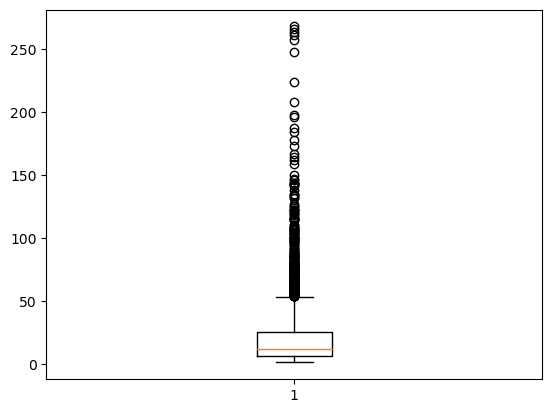

In [ ]:
counts = a19_24['id'].value_counts()

#boxplot of the counts of accidents per location

import matplotlib.pyplot as plt

plt.boxplot(counts)

plt.show()

In [ ]:
counts.describe()

count    4726.000000
mean       19.683876
std        23.898984
min         1.000000
25%         6.000000
50%        12.000000
75%        25.000000
max       268.000000
Name: id, dtype: float64

In [ ]:
a19_24

,fecha,hora,cod_lesividad,coordenada_x_utm,coordenada_y_utm,id
16,2019-01-01,04:00:00,0,438274.088,4479629.873,10012
592,2019-01-01,20:25:00,1,440224.890,4474560.945,4301
313,2019-01-01,04:15:00,0,447313.236,4475058.143,6494
35,2019-01-01,15:55:00,0,439439.715,4466846.819,4848
732,2019-01-01,06:15:00,0,439824.418,4470923.327,4774
...,...,...,...,...,...,...
3856,2024-01-31,13:05:00,0,442363.066,4481640.828,6711
3822,2024-01-31,16:00:00,0,440378.711,4475187.452,10258
3853,2024-01-31,23:00:00,0,440097.575,4474644.548,10388
3810,2024-01-31,18:30:00,0,434739.552,4470307.128,5335


In [ ]:
#columns coordenada_x_utm and coordenada_y_utm to latitute and longitude

a19_24 = a19_24.merge(id_loc[['id', 'longitud', 'latitud']], on='id')

a19_24.drop(['coordenada_x_utm', 'coordenada_y_utm'], axis=1, inplace=True)

a19_24

,fecha,hora,cod_lesividad,id,longitud,latitud
0,2019-01-01,04:00:00,0,10012,-3.724342,40.467961
1,2019-02-22,12:00:00,0,10012,-3.724342,40.467961
2,2019-04-23,14:51:00,0,10012,-3.724342,40.467961
3,2019-10-19,14:10:00,1,10012,-3.724342,40.467961
4,2019-10-21,19:25:00,0,10012,-3.724342,40.467961
...,...,...,...,...,...,...
96552,2023-12-20,17:05:00,0,6659,-3.661478,40.445668
96553,2023-12-24,17:20:00,0,6253,-3.637227,40.467722
96554,2023-12-29,16:00:00,1,5151,-3.768464,40.391183
96555,2024-01-04,14:49:00,0,3484,-3.712332,40.334683


In [ ]:
#generate columns año mes dia

df = a19_24.copy()

df['fecha'] = pd.to_datetime(df['fecha'])

df['año'] = df['fecha'].dt.year

df['mes'] = df['fecha'].dt.month

df['dia'] = df['fecha'].dt.day

#generate columns hora y minuto

df['hora'] = df['hora'].astype(str)

df['hora'] = df['hora'].str.zfill(4)

df['hour'] = df['hora'].str[:2].astype(int)

df['minute'] = df['hora'].str[3:5].astype(int)

df.drop(['hora'], axis=1, inplace=True)

df

,fecha,cod_lesividad,id,longitud,latitud,año,mes,dia,hour,minute
0,2019-01-01,0,10012,-3.724342,40.467961,2019,1,1,4,0
1,2019-02-22,0,10012,-3.724342,40.467961,2019,2,22,12,0
2,2019-04-23,0,10012,-3.724342,40.467961,2019,4,23,14,51
3,2019-10-19,1,10012,-3.724342,40.467961,2019,10,19,14,10
4,2019-10-21,0,10012,-3.724342,40.467961,2019,10,21,19,25
...,...,...,...,...,...,...,...,...,...,...
96552,2023-12-20,0,6659,-3.661478,40.445668,2023,12,20,17,5
96553,2023-12-24,0,6253,-3.637227,40.467722,2023,12,24,17,20
96554,2023-12-29,1,5151,-3.768464,40.391183,2023,12,29,16,0
96555,2024-01-04,0,3484,-3.712332,40.334683,2024,1,4,14,49


In [ ]:
#plot heatmap of accidents per day of the week and hour of the day

df['weekday'] = df['fecha'].dt.weekday

df['weekday'] = df['weekday'].map({0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

df

,fecha,cod_lesividad,id,longitud,latitud,año,mes,dia,hour,minute,weekday
0,2019-01-01,0,10012,-3.724342,40.467961,2019,1,1,4,0,Tues
1,2019-02-22,0,10012,-3.724342,40.467961,2019,2,22,12,0,Fri
2,2019-04-23,0,10012,-3.724342,40.467961,2019,4,23,14,51,Tues
3,2019-10-19,1,10012,-3.724342,40.467961,2019,10,19,14,10,Sat
4,2019-10-21,0,10012,-3.724342,40.467961,2019,10,21,19,25,Mon
...,...,...,...,...,...,...,...,...,...,...,...
96552,2023-12-20,0,6659,-3.661478,40.445668,2023,12,20,17,5,Wed
96553,2023-12-24,0,6253,-3.637227,40.467722,2023,12,24,17,20,Sun
96554,2023-12-29,1,5151,-3.768464,40.391183,2023,12,29,16,0,Fri
96555,2024-01-04,0,3484,-3.712332,40.334683,2024,1,4,14,49,Thu


In [ ]:
meteo = pd.read_csv('../data/dic_meteo23.csv', sep=';', encoding='utf-8')

meteo

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,12,1,2.25,V,...,2.60,V,1.75,V,2.08,V,4.33,V,2.85,V
1,28,79,102,81,28079102_81_98,2023,12,2,1.67,V,...,0.80,V,1.15,V,1.37,V,2.15,V,1.73,V
2,28,79,102,81,28079102_81_98,2023,12,3,0.57,V,...,1.22,V,1.73,V,1.73,V,1.20,V,1.10,V
3,28,79,102,81,28079102_81_98,2023,12,4,0.78,V,...,1.25,V,1.28,V,1.13,V,1.65,V,2.17,V
4,28,79,102,81,28079102_81_98,2023,12,5,1.58,V,...,1.17,V,1.47,V,1.87,V,1.77,V,2.10,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,28,79,59,89,28079059_89_98,2023,12,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2908,28,79,59,89,28079059_89_98,2023,12,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2909,28,79,59,89,28079059_89_98,2023,12,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2910,28,79,59,89,28079059_89_98,2023,12,30,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


In [ ]:
meteo[meteo['MAGNITUD'].isin([81, 89])].groupby('ESTACION')['MAGNITUD'].value_counts()

ESTACION  MAGNITUD
24        81          31
          89          31
39        89          31
54        81          31
          89          31
56        81          31
          89          31
59        81          31
          89          31
102       81          31
          89          31
103       81          31
          89          31
104       81          31
106       81          31
          89          31
107       81          31
          89          31
108       81          31
          89          31
Name: MAGNITUD, dtype: int64

In [ ]:
meteo_url = 'https://www.mambiente.madrid.es/opendata/meteorologia.xml'

meteo_live = pd.read_xml(meteo_url)

meteo_live

,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2024,4,4,1.38,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
1,28,79,102,82,28079102_82_98,2024,4,4,203.00,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
2,28,79,102,83,28079102_83_98,2024,4,4,9.00,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
3,28,79,102,86,28079102_86_98,2024,4,4,68.00,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
4,28,79,102,87,28079102_87_98,2024,4,4,943.00,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,28,79,59,83,28079059_83_98,2024,4,4,11.50,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
90,28,79,59,86,28079059_86_98,2024,4,4,74.00,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
91,28,79,59,87,28079059_87_98,2024,4,4,942.00,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
92,28,79,59,88,28079059_88_98,2024,4,4,1.00,V,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N


In [ ]:
meteo_live[meteo_live['magnitud'].isin([81, 89])].groupby('estacion')['magnitud'].value_counts()

estacion  magnitud
24        81          1
          89          1
39        89          1
54        81          1
          89          1
56        81          1
          89          1
59        81          1
          89          1
102       81          1
          89          1
103       81          1
          89          1
104       81          1
106       81          1
          89          1
107       81          1
          89          1
108       81          1
          89          1
Name: magnitud, dtype: int64

In [ ]:
meteo_live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       94 non-null     int64  
 1   municipio       94 non-null     int64  
 2   estacion        94 non-null     int64  
 3   magnitud        94 non-null     int64  
 4   punto_muestreo  94 non-null     object 
 5   ano             94 non-null     int64  
 6   mes             94 non-null     int64  
 7   dia             94 non-null     int64  
 8   H01             94 non-null     float64
 9   V01             94 non-null     object 
 10  H02             94 non-null     float64
 11  V02             94 non-null     object 
 12  H03             94 non-null     float64
 13  V03             94 non-null     object 
 14  H04             94 non-null     float64
 15  V04             94 non-null     object 
 16  H05             94 non-null     float64
 17  V05             94 non-null     objec

In [ ]:
estaciones = pd.read_csv('../data/estaciones_meteo.csv', sep=';', encoding='utf-8')

estaciones

,CÓDIGO,CÓDIGO_CORTO,ESTACIÓN,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,VV (81),DV (82),T (83),...,P (89),COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,NaN,NaN,X,...,NaN,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-37.122.567,404.238.823
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,NaN,NaN,X,...,NaN,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-36.823.158,404.215.533
2,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,NaN,NaN,X,...,NaN,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-36.392.422,404.400.457
3,28079018,18,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632,NaN,NaN,X,...,NaN,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-37.318.356,403.947.825
4,28079024,24,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646,X,X,X,...,X,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-37.473.445,404.193.577
5,28079035,35,Plaza del Carmen,Plaza del Carmen esq. Tres Cruces.,"3°42'11.40""O","40°25'9.15""N",660,NaN,NaN,X,...,NaN,145800.0,PLAZA,DEL,CARMEN,NaN,"440346,3619","4474524,357",-37.031.662,404.192.091
6,28079036,36,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,"3°38'43.02""O","40°24'28.64""N",671,NaN,NaN,X,...,NaN,522000.0,AVENIDA,DE,MORATALAZ,NaN,"445245,513","4473237,349",-36.453.104,404.079.517
7,28079038,38,Cuatro Caminos,Avd. Pablo Iglesias esq. C/ Marqués de Lema,"3°42'25.64""O","40°26'43.97""N",699,NaN,NaN,X,...,NaN,554550.0,AVENIDA,DE,PABLO IGLESIAS,NaN,"440033,4632","4477450,211",-37.071.303,404.455.439
8,28079039,39,Barrio del Pilar,Avd. Betanzos esq. C/ Monforte de Lemos,"3°42'41.53""O","40°28'41.64""N",676,NaN,NaN,X,...,X,514425.0,AVENIDA,DE,MONFORTE DE LEMOS,NaN,"439689,0496","4481081,619",-37.115.364,404.782.322
9,28079054,54,Ensanche de Vallecas,Avda La Gavia / Avda. Las Suertes,"3°36'43.70""O","40°22'22.84""N",629,X,X,X,...,X,31000516.0,AVENIDA,DE,LA GAVIA,NaN,"448033,2263","4469339,044",-36.121.394,403.730.118


In [ ]:
estaciones = estaciones[['CÓDIGO_CORTO', 'COORDENADA_X_ETRS89', 'COORDENADA_Y_ETRS89']]

#rename columns

estaciones.columns = ['id', 'utm_x', 'utm_y']

#convert to numeric

estaciones['utm_x'] = pd.to_numeric(estaciones['utm_x'].str.replace(',', '.'))
estaciones['utm_y'] = pd.to_numeric(estaciones['utm_y'].str.replace(',', '.'))

estaciones

C:\Users\calba\AppData\Local\Temp\ipykernel_14908\681748548.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['utm_x'] = pd.to_numeric(estaciones['utm_x'].str.replace(',', '.'))
C:\Users\calba\AppData\Local\Temp\ipykernel_14908\681748548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['utm_y'] = pd.to_numeric(estaciones['utm_y'].str.replace(',', '.'))


,id,utm_x,utm_y
0,4,439579.3291,4475049.263
1,8,442117.2366,4474770.696
2,16,445786.1729,4476796.019
3,18,437891.6961,4471832.769
4,24,436598.5637,4474571.618
5,35,440346.3619,4474524.357
6,36,445245.5130,4473237.349
7,38,440033.4632,4477450.211
8,39,439689.0496,4481081.619
9,54,448033.2263,4469339.044


In [ ]:

#convert the coordinates to lat and long

from pyproj import Proj, transform

inProj = Proj(init='epsg:25830')

outProj = Proj(init='epsg:4326')

estaciones['longitud'], estaciones['latitud'] = transform(inProj, outProj, estaciones['utm_x'].values, estaciones['utm_y'].values)

estaciones

c:\Users\calba\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\calba\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\calba\AppData\Local\Temp\ipykernel_14908\2129525431.py:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  estaciones['l

,id,utm_x,utm_y,longitud,latitud
0,4,439579.3291,4475049.263,-3.712257,40.423882
1,8,442117.2366,4474770.696,-3.682316,40.421553
2,16,445786.1729,4476796.019,-3.639242,40.440046
3,18,437891.6961,4471832.769,-3.731836,40.394782
4,24,436598.5637,4474571.618,-3.747344,40.419358
5,35,440346.3619,4474524.357,-3.703166,40.419209
6,36,445245.5130,4473237.349,-3.645310,40.407952
7,38,440033.4632,4477450.211,-3.707130,40.445544
8,39,439689.0496,4481081.619,-3.711536,40.478232
9,54,448033.2263,4469339.044,-3.612139,40.373012


In [84]:
#plot coordinates on map

import folium

m = folium.Map(location=[40.416775, -3.703790], zoom_start=12)

for i in range(len(estaciones)):

    folium.Marker([estaciones.iloc[i]['latitud'], estaciones.iloc[i]['longitud']], popup=estaciones.iloc[i]['id']).add_to(m)

m

In [114]:
validas = [24, 54, 56, 59, 102, 103, 106, 107, 108]


est_vals = estaciones[estaciones['id'].isin(validas)]

est_vals

,id,utm_x,utm_y,longitud,latitud
4,24,436598.5637,4474571.618,-3.747344,40.419358
9,54,448033.2263,4469339.044,-3.612139,40.373012
10,56,438991.9161,4470741.548,-3.718768,40.385034
12,59,447744.4666,4479077.678,-3.616341,40.460726
13,102,445947.8900,4472195.400,-3.636944,40.398611
14,103,439633.6500,4466785.760,-3.710833,40.349444
16,106,437130.6800,4476974.190,-3.741310,40.441041
17,107,444215.2000,4479200.020,-3.657976,40.461598
18,108,439037.6900,4480778.490,-3.719191,40.475454


In [115]:
#draw the map again

m = folium.Map(location=[40.416775, -3.703790], zoom_start=12)

for i in range(len(est_vals)):

    folium.Marker([est_vals.iloc[i]['latitud'], est_vals.iloc[i]['longitud']], popup=est_vals.iloc[i]['id']).add_to(m)

m

In [2]:
#take all months from 2019, 2020, 2021, 2022, 2023, 2024

months = ['ene_meteo19', 'feb_meteo19', 'mar_meteo19', 'abr_meteo19', 'may_meteo19', 'jun_meteo19', 
          'jul_meteo19', 'ago_meteo19', 'sep_meteo19', 'oct_meteo19', 'nov_meteo19', 'dic_meteo19', 
          'ene_meteo20', 'feb_meteo20', 'mar_meteo20', 'abr_meteo20', 'may_meteo20', 'jun_meteo20', 
          'jul_meteo20', 'ago_meteo20_1', 'sep_meteo20', 'oct_meteo20', 'nov_meteo20', 'dic_meteo20', 
          'ene_meteo21', 'feb_meteo21', 'mar_meteo21', 'abr_meteo21', 'may_meteo21', 'jun_meteo21', 
          'jul_meteo21', 'ago_meteo21', 'sep_meteo21', 'oct_meteo21', 'nov_meteo21', 'dic_meteo21', 
          'ene_meteo22', 'feb_meteo22', 'mar_meteo22', 'abr_meteo22', 'may_meteo22', 'jun_meteo22', 
          'jul_meteo22', 'ago_meteo22', 'sep_meteo22', 'oct_meteo22', 'nov_meteo22', 'dic_meteo22', 
          'ene_meteo23', 'feb_meteo23', 'mar_meteo23', 'abr_meteo23', 'may_meteo_23', 'jun_meteo23', 
          'jul_meteo23', 'ago_meteo23', 'sep_meteo23', 'oct_meteo23', 'nov_meteo23', 'dic_meteo23', 
          'ene_meteo24', 'feb_meteo24']

meteo_hist = pd.DataFrame()

for i in months:

    print(i)
    
    meteo_hist = meteo_hist.append(pd.read_xml(f'https://datos.madrid.es/egobfiles/MANUAL/300352/{i}.xml'))

meteo_hist

NameError: name 'pd' is not defined

In [132]:
id_loc

#drop utm_x and utm_y

id_loc.drop(['utm_x', 'utm_y'], axis=1, inplace=True)

#find the closest station to each id

# Convert the coordinates to NumPy arrays for faster computation

id_loc_coords = id_loc[['longitud', 'latitud']].values

est_vals_coords = est_vals[['longitud', 'latitud']].values

# Use cdist to compute pairwise distances efficiently

distances = distance.cdist(id_loc_coords, est_vals_coords, metric='euclidean')

# Find the index of the minimum distance for each row

min_indices = np.argmin(distances, axis=1)

# Map the indices to the corresponding 'id' in id_loc

id_loc['estacion'] = est_vals.iloc[min_indices]['id'].values

id_loc

,id,longitud,latitud,estacion
0,3840,-3.688323,40.430502,107
1,3841,-3.687256,40.430524,107
2,3842,-3.691727,40.422132,56
3,3843,-3.691929,40.421433,56
4,3844,-3.688470,40.433782,107
...,...,...,...,...
4890,6809,-3.659954,40.483080,107
4891,6810,-3.659926,40.483158,107
4892,6933,-3.672497,40.484118,107
4893,7129,-3.672500,40.484181,107


In [133]:
id_loc['estacion'].value_counts()

107    1209
56      927
108     732
102     713
59      412
106     333
24      311
103     179
54       79
Name: estacion, dtype: int64

## Tráfico

In [96]:
#para comparar el tiempo

prueba = pd.read_csv('zips/03-2022.csv', sep=';', encoding='latin1', usecols=['id', 'fecha', 'intensidad', 'ocupacion', 'carga', 'vmed', 'error'], dtype={'id': 'category', 'intensidad': 'int16', 'ocupacion': 'float32', 'carga': 'float32', 'vmed': 'float32', 'error': 'category'}, parse_dates=['fecha'])

prueba

,id,fecha,intensidad,ocupacion,carga,vmed,error
0,1001,2022-03-01 00:00:00,408,2.0,0.0,52.0,N
1,1001,2022-03-01 00:15:00,336,1.0,0.0,38.0,N
2,1001,2022-03-01 00:30:00,276,2.0,0.0,37.0,N
3,1001,2022-03-01 00:45:00,252,0.0,0.0,45.0,N
4,1001,2022-03-01 01:00:00,312,1.0,0.0,51.0,N
...,...,...,...,...,...,...,...
11796895,10965,2022-03-31 22:45:00,127,1.0,4.0,0.0,N
11796896,10965,2022-03-31 23:00:00,105,5.0,7.0,0.0,N
11796897,10965,2022-03-31 23:15:00,77,0.0,2.0,0.0,N
11796898,10965,2022-03-31 23:30:00,118,1.0,4.0,0.0,N


In [20]:
import vaex
import tqdm

In [97]:
#csv files that end in 19, 20, 21, 22, 23

csv_files = glob.glob(os.path.join(path + '\\zips', "*-2022.csv")) + glob.glob(os.path.join(path + '\\zips', "*-2023.csv"))



# Loop through each CSV file
for i in tqdm.tqdm(csv_files):

    print(i)
    # Read the CSV file and concatenate it with the existing DataFrame
    df_new = vaex.from_csv(i, sep=';', encoding='latin1', usecols=['id', 'fecha', 'intensidad', 'ocupacion', 'carga', 'vmed', 'error'], dtype={'id': 'str', 'intensidad': 'int16', 'ocupacion': 'float32', 'carga': 'float32', 'vmed': 'float32', 'error': 'str'}, convert=True, chunk_size=2_000_000)

  0%|          | 0/21 [00:00<?, ?it/s]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\03-2022.csv


  5%|▍         | 1/21 [00:18<06:18, 18.94s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\04-2022.csv


 10%|▉         | 2/21 [00:46<07:38, 24.12s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\05-2022.csv


 14%|█▍        | 3/21 [01:17<08:13, 27.39s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\06-2022.csv


 19%|█▉        | 4/21 [01:53<08:39, 30.54s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\07-2022.csv


 24%|██▍       | 5/21 [02:28<08:35, 32.21s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\08-2022.csv


 29%|██▊       | 6/21 [02:53<07:27, 29.85s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\09-2022.csv


 33%|███▎      | 7/21 [03:36<07:57, 34.11s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\10-2022.csv


 38%|███▊      | 8/21 [04:09<07:17, 33.67s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\11-2022.csv


 43%|████▎     | 9/21 [04:36<06:20, 31.67s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\12-2022.csv


 48%|████▊     | 10/21 [05:04<05:36, 30.59s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\01-2023.csv


 52%|█████▏    | 11/21 [05:32<04:57, 29.74s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\02-2023.csv


 57%|█████▋    | 12/21 [05:59<04:20, 28.99s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\03-2023.csv


 62%|██████▏   | 13/21 [06:36<04:10, 31.31s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\04-2023.csv


 67%|██████▋   | 14/21 [07:13<03:50, 32.86s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\05-2023.csv


 71%|███████▏  | 15/21 [07:49<03:24, 34.09s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\06-2023.csv


 76%|███████▌  | 16/21 [08:29<02:58, 35.72s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\07-2023.csv


 81%|████████  | 17/21 [09:09<02:27, 36.93s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\08-2023.csv


 86%|████████▌ | 18/21 [09:45<01:50, 36.85s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\09-2023.csv


 90%|█████████ | 19/21 [10:20<01:12, 36.09s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\10-2023.csv


 95%|█████████▌| 20/21 [10:49<00:34, 34.09s/it]

c:\Users\calba\OneDrive\Documentos\Mad-Traffic\notebooks\zips\11-2023.csv


100%|██████████| 21/21 [11:17<00:00, 32.28s/it]


In [21]:
hdf5_files = glob.glob(os.path.join(path + '\\zips', "*.hdf5"))

vaex_df = vaex.open_many(hdf5_files)
vaex_df.drop('error', inplace=True)

vaex_df.info()

# Como tomo los datos en tiempo real

In [177]:
def get_live_traffic():

    import xml.etree.ElementTree as ET

    url = 'https://informo.madrid.es/informo/tmadrid/pm.xml'

    response = requests.get(url)

    root = ET.fromstring(response.content)

    fecha = []
    hora = []

    fech = root.find('fecha_hora').text.split(' ')[0]
    hor = root.find('fecha_hora').text.split(' ')[1]

    idelem = []
    intensidad = []
    ocupacion = []
    carga = []
    vmed = []


    for i in root.findall('pm'):

        fecha.append(fech)
        hora.append(hor)
        idelem.append(i.find('idelem').text)
        intensidad.append(i.find('intensidad').text)
        ocupacion.append(i.find('ocupacion').text)
        carga.append(i.find('carga').text)
        try:
            vmed.append(i.find('velocidad').text)
        except:
            vmed.append(np.nan)


    live = pd.DataFrame({'fecha': fecha, 'hora': hora, 'idelem': idelem, 'intensidad': intensidad, 'ocupacion': ocupacion, 'carga': carga, 'vmed': vmed})

    return live

In [178]:
live = get_live_traffic()

live

,fecha,hora,idelem,intensidad,ocupacion,carga,vmed
0,11/03/2024,18:50:10,3409,254,2,10,NaN
1,11/03/2024,18:50:10,4739,127,1,9,NaN
2,11/03/2024,18:50:10,4740,254,7,23,NaN
3,11/03/2024,18:50:10,4741,296,4,23,NaN
4,11/03/2024,18:50:10,4742,381,2,14,NaN
...,...,...,...,...,...,...,...
4761,11/03/2024,18:50:10,6786,1080,10,82,55
4762,11/03/2024,18:50:10,6785,1320,8,42,48
4763,11/03/2024,18:50:10,6807,2640,16,78,51
4764,11/03/2024,18:50:10,6808,300,3,25,54


In [142]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4764 entries, 0 to 4763
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       4764 non-null   object
 1   hora        4764 non-null   object
 2   idelem      4764 non-null   object
 3   intensidad  4764 non-null   object
 4   ocupacion   4764 non-null   object
 5   carga       4764 non-null   object
 6   vmed        289 non-null    object
dtypes: object(7)
memory usage: 260.7+ KB


In [144]:
live[live['vmed'].notna()]

,fecha,hora,idelem,intensidad,ocupacion,carga,vmed
4475,26/02/2024,0:25:56,6639,420,0,9,82
4476,26/02/2024,0:25:56,3797,60,0,4,57
4477,26/02/2024,0:25:56,6640,360,0,15,86
4478,26/02/2024,0:25:56,6641,720,1,13,92
4479,26/02/2024,0:25:56,6642,720,1,11,95
...,...,...,...,...,...,...,...
4759,26/02/2024,0:25:56,6786,300,3,25,53
4760,26/02/2024,0:25:56,6785,420,2,13,48
4761,26/02/2024,0:25:56,6807,540,2,17,67
4762,26/02/2024,0:25:56,6808,0,0,0,-1
